<a href="https://colab.research.google.com/github/StillWork/colab-1/blob/master/f_10_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## 마지막 스텝의 출력만 얻는 경우

In [0]:
from keras.layers import SimpleRNN

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### 아래는 전체 스텝에 대한 출력을 얻는 코드이다

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### RNN을 여러 계층으로 쌓는 경우에는 중간 계층이 전체 스텝에 대한 출력을 내보내야 한다.

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Embedding과 SimpleRNN을 사용

In [7]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.6515 - acc: 0.6002 - val_loss: 0.5462 - val_acc: 0.7536
Epoch 2/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.4382 - acc: 0.8141 - val_loss: 0.3865 - val_acc: 0.8394
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.3104 - acc: 0.8750 - val_loss: 0.4016 - val_acc: 0.8186
Epoch 4/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.2346 - acc: 0.9093 - val_loss: 0.3240 - val_acc: 0.8762
Epoch 5/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1810 - acc: 0.9325 - val_loss: 0.4121 - val_acc: 0.8546
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1347 - acc: 0.9523 - val_loss: 0.3858 - val_acc: 0.8472
Epoch 7/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1008 - acc: 0.9660 - val_loss: 0.4247 - val_acc:

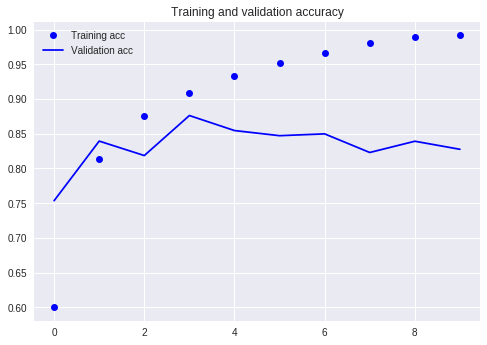

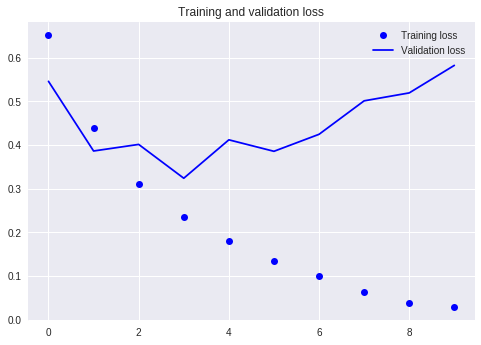

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 500개의 샘플만 사용하여 성능이 좋지 않다

## 경사 소실문제를 해결하기 위해서 LSTM 사용
### 감성분석 같은 **간단한** 문제에서는 임베딩이나 LSTM이 큰 효과를 보이지는 않는다

In [0]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 189s 9ms/step - loss: 0.5089 - acc: 0.7627 - val_loss: 0.3410 - val_acc: 0.8738
Epoch 2/10
20000/20000 [==============================] - 189s 9ms/step - loss: 0.2942 - acc: 0.8842 - val_loss: 0.4029 - val_acc: 0.8126
Epoch 3/10
20000/20000 [==============================] - 191s 10ms/step - loss: 0.2344 - acc: 0.9090 - val_loss: 0.3595 - val_acc: 0.8756
Epoch 4/10
20000/20000 [==============================] - 192s 10ms/step - loss: 0.1955 - acc: 0.9277 - val_loss: 0.3770 - val_acc: 0.8806
Epoch 5/10
17664/20000 [=========================>....] - ETA: 21s - loss: 0.1699 - acc: 0.9390

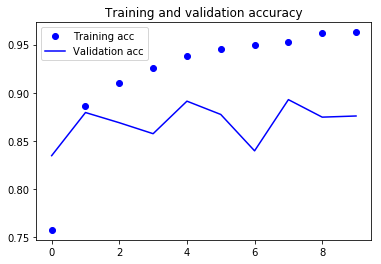

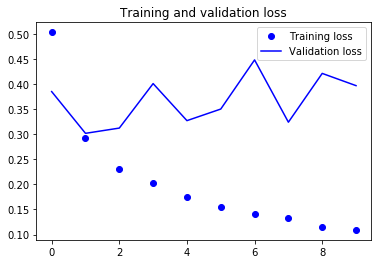

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()